**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

**DATA PREPERATION**

In [ ]:
#data collection
#loading dataset into pandas dataframe
train_df = pd.read_csv(r'dataset/train.csv')

In [249]:
train_df.head(5)

,text
0,house dem aide didnt even see comeys letter ja...
1,ever get feeling life circle roundabout rather...
2,truth might get fired october tension intellig...
3,video civilian killed single u airstrike ident...
4,print iranian woman sentenced six year prison ...


In [250]:
#deleting unwanted columns
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

KeyError: "['author'] not found in axis"

In [ ]:
train_df.shape

(20800, 2)

In [ ]:
train_df.head(5)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_df.head(5)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_df.isna().sum()

text    0
dtype: int64

In [94]:
print(train_df.columns)

Index(['text'], dtype='object')


In [97]:
def create_distribution(dataFile):
    return sb.countplot(x='labels', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

ValueError: Could not interpret input 'labels'

In [95]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20761 entries, 0 to 20760
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
dtypes: object(1)
memory usage: 162.3+ KB
check finished.


In [ ]:
train_df = train_df.dropna()

In [ ]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB
check finished.


In [ ]:
train_df.shape

(20761, 2)

In [ ]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [ ]:
train_df.reset_index(drop= True,inplace=True)

In [ ]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [ ]:
label_train = train_df.label

In [ ]:
label_train.head(10)

0    1
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    0
9    0
Name: label, dtype: int64

In [ ]:
train_df = train_df.drop("label", axis = 1)

In [ ]:
train_df.head(10)

,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...
4,Print \nAn Iranian woman has been sentenced to...
5,"In these trying times, Jackie Mason is the Voi..."
6,Ever wonder how Britain’s most iconic pop pian...
7,"PARIS — France chose an idealistic, traditi..."
8,Donald J. Trump is scheduled to make a highly ...
9,A week before Michael T. Flynn resigned as nat...


In [ ]:
train_df['text'][2]

'Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts and political policymakers has always been between honest assessments and desired results, with the latter often overwhelming the former, as in the Iraq War, writes Lawrence Davidson. \nBy Lawrence Davidson \nFor those who might wonder why foreign policy makers repeatedly make bad choices, some insight might be drawn from the following analysis. The action here plays out in the United States, but the lessons are probably universal. \nBack in the early spring of 2003, George W. Bush initiated the invasion of Iraq. One of his key public reasons for doing so was the claim that the country’s dictator, Saddam Hussein, was on the verge of developing nuclear weapons and was hiding other weapons of mass destruction. The real reason went beyond that charge and included a long-range plan for “regime change” in the Middle East. President George W. Bush and Vice President Dick Cheney receive an Oval Off

**PRE PROCESSING OF DATA**

In [ ]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [ ]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**LEMMATIZATION**

Lemmatization is the process of reducing words to their base or dictionary form, known as the "lemma." 
In natural language processing (NLP), lemmatization is an important technique used to normalize text data by removing 			  inflections, conjugations, and other variations of a word to bring them to their root form.

         example:the word "cats" can be lemmatized to "cat",
		 	    "running" to "run", 
		 	    "am" to "be"
		 	    "ate" to "eat"
Lemmatization is similar to stemming, but it produces more accurate results because it takes into account the context of the 			word in a sentence and uses more advanced linguistic analysis to identify the base form.
Lemmatization can improve the accuracy of text analysis and machine learning models that rely on text data.

In [ ]:
#lemmatization
for x in range(len(train_df)) :
    corpus = []
    review = train_df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['text'][x] = review      

In [ ]:
def process_text(review):
    corpus = []
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review:
    
        if y not in stpwrds:
            corpus.append(lemmatizer.lemmatize(y))
    return ' '.join(corpus)


train_df['text'] = train_df['text'].apply(process_text)

print(train_df['text'][2182])

comment actor steven seagal stood america rest hollywood remains silent week rough country first democratic nominee hillary clinton collapsed memorial called million hardworking american deplorable werent enough nfl player throughout country blatantly disrespecting american flag needle say seagal enough think important job secretary state ensuring people dont get killed seagal tweeted cant email protected pneumonia going disastrous american people notohillary continued course seagal quickly became target liberal fire comment refused break particularly lost one twitter user tried argued hillary capable presidency capable capable leaving american die capable disregarding law capable disrespecting rape survivor argued went address race relation united state true role president barack obama played social evolution country obama abysmal race relation usa truth need start honest dialog wrote seagal concluded pointing irony attack receiving liberal everywhere best thing worldmaking one statem

In [ ]:
train_df['text'][2188]

'article written john vibe originally published activist postcom editor comment surface good intention bush like patriotic establishment figure always honor troop count sacrifice typically stoic praiseworthy everything military underneath surface one wonder really going inside disturbed mind george w bush whose order illegal war iraq broader war terror afghanistan elsewhere resulted death thousand u troop ten thousand wounded injured potentially million civilian dead feel remorse guilt admitted personal responsibility happened life painting reveal morbid sense power life men woman reflect upon humanize fact considering iraq war based upon provable lie false intelligence prefer lie something seems honoring victim wouldnt harmed bush hadnt authorized action took place watch george w bush paint portrait veteran injured carrying order john vibe veteran day former president george w bush revealed one favorite hobby talent painting portrait however extremely disturbing twist week bush posted

**SPLITTING THE DATASET INTO TRAINING DATA & TEST DATA:**

In [146]:
#splitting the dataset to training and test dataset,80% data to be training data &20% will be testing data.(ie test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.2, random_state=4)

In [147]:
X_train

14903    share thursday bundy verdict standing rock res...
18153    source global research u state dept dismisses ...
2271     friday hugh hewitts radio show health human se...
19372    american scrambling meet tax filing deadline n...
9446     wmwadmin march shortly joined islamic state ho...
                               ...                        
16840    new york time article pointed alleged rape mar...
11863    czech one characteristic nation whether standp...
17093    senator tim scott perfect response twitter use...
8366     virginia governor said monday signed paper res...
17530    according report congressional black caucus cb...
Name: text, Length: 16608, dtype: object

In [148]:
X_train.shape

(16608,)

In [149]:
Y_train

14903    1
18153    1
2271     0
19372    0
9446     1
        ..
16840    0
11863    1
17093    0
8366     0
17530    0
Name: label, Length: 16608, dtype: int64

In [150]:
Y_test

10693    0
1985     0
3492     1
18838    1
13617    1
        ..
15819    0
6555     1
9515     1
5587     1
5451     0
Name: label, Length: 4153, dtype: int64

In [151]:
X_test

10693    woman united state feel unequal despite great ...
1985     week top story look ahead southern florida ram...
3492     email election day fast approaching citizen ev...
18838    clandestine corner world elite come together s...
13617    november approximately pm cdt shooting occurre...
                               ...                        
15819    former texas middle school teacher admittedly ...
6555     dear mr president many job building wall creat...
9515     breaking soros election tampering explodes ill...
5587     russia super secret spy submarine return sea y...
5451     month chief james p oneill man blue uniform fo...
Name: text, Length: 4153, dtype: object

**CONVERTING THE TEXTUAL DATA TO NUMERICAL DATA**

converting to textual data into numerical data/feature vector

1)**tf (term freequency)**:-which counts the number of time a perticular words is repearting in a documents.

2)**idf (inverse document freequency)**:-Measure the word is a rare word or common word in a document

In [152]:
#converting to textual data into numerical data/feature vector

tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [153]:
print(tfidf_X_train,tfidf_X_test)

  (0, 14855)	0.04483984243035253
  (0, 64205)	0.03787020759590246
  (0, 10881)	0.049586309963192514
  (0, 104596)	0.02308456121385302
  (0, 144317)	0.02197457609297604
  (0, 47024)	0.026178394298511792
  (0, 104031)	0.045256607893379174
  (0, 39514)	0.05196808422220586
  (0, 81194)	0.023391316677902074
  (0, 52813)	0.021797230663980986
  (0, 100682)	0.031680696786197934
  (0, 144706)	0.03784922021726877
  (0, 40422)	0.05789300649329992
  (0, 140021)	0.0427075381010317
  (0, 111104)	0.06378835836420015
  (0, 9365)	0.033189024341354616
  (0, 1227)	0.037006220793380555
  (0, 20010)	0.07686297157465657
  (0, 146317)	0.06902143570874651
  (0, 103025)	0.038934751483753825
  (0, 58701)	0.025063648726978763
  (0, 10109)	0.02102656235559183
  (0, 117292)	0.07489749219520277
  (0, 37925)	0.04366778929465987
  (0, 78343)	0.0270939332929645
  :	:
  (16607, 104596)	0.05785360129117836
  (16607, 144317)	0.01835726703586905
  (16607, 47024)	0.021869080553579386
  (16607, 39514)	0.02170672133499086
  

In [154]:
tfidf_X_train.shape

(16608, 147401)

In [155]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**CLASSIFICATION MODEL:-PASSIVE AGGRESSIVE CLASSIFIER**

Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example.

Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few 'online-learning algorithmns. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-leaming algorithm will get a training example, update the classifier, and then throw away the example.

In [156]:
#model and model training

classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

**ACCURACY SCORE & CONFUSION MATRIX**

Accuracy: 95.52%
Confusion matrix, without normalization


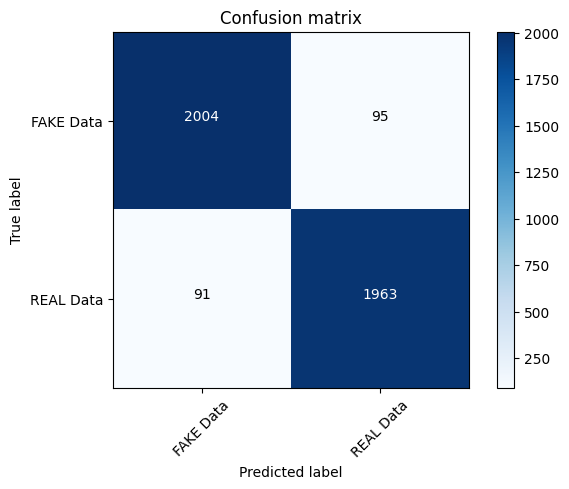

In [216]:
#accuracy score on the test data
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**CLASSIFICATION REPORT**

In [158]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2099
           1       0.95      0.96      0.95      2054

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153



**SAVING & LOADING MODEL**

In [159]:
#pickling the model into disk
pickle.dump(classifier,open('./model.pkl', 'wb'))
pickle.dump(tfidf_v,open('vector.pkl', 'wb'))

In [160]:
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))
#vector_form = pickle.load(open('vector.pkl', 'rb'))

**BUILDING A PREDICTIVE SYSTEM**

In [161]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    corpus = []
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 1:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")
      

In [163]:
X_test

Y_test

10693    0
1985     0
3492     1
18838    1
13617    1
        ..
15819    0
6555     1
9515     1
5587     1
5451     0
Name: label, Length: 4153, dtype: int64

In [142]:
X_test.head(20)
# train_df['text'][20822]

9383     jerusalem mr president woman called waad qanna...
1471     milo upcoming book dangerous jumped number one...
4480     new delhi india rapidly worsening air pollutio...
17543    nothing presidential dignified sense ruling cl...
775      thursday republican senator ted cruz lindsey g...
18       fbi close hillary posted home headline world n...
19161    french aerospace giant airbus recently unveile...
14599    thursday san antonios ktsa broadcast trey ware...
6139     berlin ship harbor safe ship built old maritim...
18596    member arctic council united state signed onto...
7673     rigged doj weiner email probe led podestas clo...
11848    rainy night queen armani graf leapt swirling r...
9233     warsaw europe populist scrambled outdo one ano...
2158                                                      
7614        source add conversation using facebook comment
3474     politics donald trump republican candidate u p...
4165     new home sale tightrope walk windy canyon lee .

In [164]:
X_test[18838]

'clandestine corner world elite come together secrecy dont mind know society meeting others maintain organize yet doorman speak friend initiation rite leaked people peek window chanting far underground lair heard passerby conspiracy theorist long held someone fate manipulating world perhaps secret society string pulled list seven group secret member never admit involvement meeting place hiding plain sight new connecticut ivy league yale university considered one selective higher educational institution united state world motto lux et veritas translates light truth historic campus new connecticut building light truth reserved carefully selected member alumnus known skull bone secret society minimal organization started official roster member published bonesmen member called head corporation senior government official supreme court justice even president theory skull bone actually range member controlling central intelligence agency part global network aimed world domination branch illum

In [165]:
Y_test[18838]

1

In [192]:
news=str(input(

'clandestine corner world elite come together secrecy dont mind know society meeting others maintain organize yet doorman speak friend initiation rite leaked people peek window chanting far underground lair heard passerby conspiracy theorist long held someone fate manipulating world perhaps secret society string pulled list seven group secret member never admit involvement meeting place hiding plain sight new connecticut ivy league yale university considered one selective higher educational institution united state world motto lux et veritas translates light truth historic campus new connecticut building light truth reserved carefully selected member alumnus known skull bone secret society minimal organization started official roster member published bonesmen member called head corporation senior government official supreme court justice even president theory skull bone actually range member controlling central intelligence agency part global network aimed world domination branch illuminati also unknown exactly happens tomb group headquarters strange rumor contained windowless sandstone building egyptodoric style structure make appear immense sepulcher tomb thought hold secret document containing roster member ritual detail well multiple stolen relic bone rumored tomb include skull geronimo pancho villa martin van buren gravestone elihu yale school founder bonesmen also known take society belonging show thievery cunning known crooking oosterbeek netherlands hotel de bilderberg photo michielcc bysa november delegate country western europe american spent three day oosterbeek netherlands hotel de bilderberg purpose meeting said foster conversation europe north america attendance included prince prime minster head cia since meeting year group international leader field politics business medium communication met discus exactly sure agenda resolution proposed voting kind executed position policy statement issued meeting held different location year year topic meeting general public theorize roster attendee never officially made public leak year conspiracy theory abound especially group intense level secrecy many believe group conspiring impose capital domination world government planned economy certain prominent likely youll get invitation next year bilderberg conference trementina new mexico trementina base new mexico photo google earth scientology visible today celebrity member like tom cruise john travolta yet organization aggressive year tackling critic maintaining secret one controversial religious group characterize movement cult basic scientology belief hold human immortal reincarnated lived planet finding earth one thing make religion controversial assertive nature often turning character assassination litigation dealing skeptic critic question practice church also extremely secretive holding many teaching member made multiple level scientology operates several church called celebrity centre opened public primarily meant anyone power vision create better world church spiritual technology cst reserved trusted member many member manage elaborate base including trementina base official word church base location used preserve scientology founder l ron hubbard writing said engraved steel sheet encased titanium case thought trementina location archive hubbard work however trementina contains underground dwelling tunnel whats interesting base see outside aerial photograph base show huge image dug earth image church logo former member claimed symbol mark return point member travel future member stated place hubbard supposed go return illuminati domus sanctae marthae vatican city vatican pope francis entering domus sanctae marthae photo pufui pc pifpef icc bysa established bavaria germany group freethinker humanist academic opposed superstition prejudice religion influence public supported advancement woman illuminati shadowy group believed capable influencing movement government art group infiltrated shut decade founding official record go conspiracy theorist long obsessed world controlled illuminati generation many modern group claim descendant original bavarian illuminati go far use name illuminati title evidence recent organization tied original besides action major mystery group location headquarters theorist claimed many prominent location headquarters illuminati disney world orlando florida mormon temple salt lake city utah statue liberty new york city big ben london eiffel tower paris pentagon washington dc among many others vatican theory illuminati headquarters located vatican especially interesting due group opposition church believed conspiracy theorist church long ago infiltrated society would make leader pope one illuminatis highest ranking member today pope resides simple room domus sanctae marthae guest house adjacent st peter basilica fivestory building containing suite single room clergy town official holy see business perhaps illuminati meeting two ordo templi orientis bay area thelemic temple oakland california mural aleister crowley abode chaos photo thierry ehrmanncc order temple east founded either austria germany believed wealthy industrialist carl kellner began religious movement famed occultist aleister crowley whose name addition group shrouded curiosity mystery oto modeled somewhat another secret society freemasonry crowley added layer selfcreated belief system called thelema thelemas practice belief written book titled book law core belief thou wilt shall whole law idea occultism eastern western mysticism found way thelema thus oto religion highly secretive member move order series rite ritual moving level form initiation level curious name minerval master magician illustrious knight grandmaster light two component core oto magical ritual rumored include tantric sex summoning angel demon astral projection gnostic mass reminiscent catholic mass contains host wine toward end gnostic mass includes elaborate costume climax mass believed host turn body god wine blood god multiple location worship called camp oasis lodge majority keep location secretive greater public relatively small location oakland oasis hold weekly gnostic mass temple decorated candle egyptian imagery unknown exactly take place initiation ceremony knowledge shared event according crowleys autobiography confession aleister crowley oto possession one supreme secret whole system directed towards communicating member progressively plain hint allimportant instruction priory sion bibliothque nationale de france paris france national library france reading room photo vincent desjardinscc secret secret society many people believe existence scholarly claim repetitively stated group complete myth constructed imagination madman myth begin priory sion group charged protecting descendant jesus nazareth mary magdalene eventually went settle france leaked bibliothque nationale de france paris french national library possession file calleddossiers secret dhenri lobineau pointed priory sion located france file contained introduction map france genealogy newspaper clipping letter list grand master priory sion included sir isaac newton victor hugo leonardo da vinci authenticity file questioned ever since left library eventually traced pierre plantard believed plantard planted document library order perpetuate elaborate hoax claimed descendant jesus bloodline academic went agree priory sion hoax constructed plantard yet book article movie continue made group whether secret society dedicated protecting family descendant biblical time may never know rosicrucianism rosicrucian park san jose california rosicrucian egyptian museum ground photo ginabovarapublic domain several manifesto anonymously published early th century told legend mysticism alchemy order temple rosy cross one document fama fraternitatis published cassel germany fama spoke th century german doctor mystical philosopher christian rosenkreuz traveled part middle east learned esoteric wisdom studying place turkey egypt claimed learn extensive knowledge regarding nature universe returned attempted share learned dismissed formed likeminded group called fraternity rose cross year birth death remain shadowy document claim lived year group upheld christian belief strongly opposed roman catholicism also said influenced freemasonry along hundred group many adopted title similar name throughout modern time simplest form group aimed promote universal reformation mankind report claim requirement membership one must capable using average amount brain power rosenkreuzs life group thought consisted handful member doctor member took oath remain bachelor also treat sick without payment find replacement died interest group peaked appearance anonymous work included fama fraternitatis ranged content included mysticism apocalyptic warning whether rosenkreuzs original idea continued unknown one hundred group claiming tied original ancient mystical order rosea crucis connection occultist aleister crowley amorc claim devoted study elusive mystery life universe utilize idea major philosopher including thales pythagoras healing technique alchemy symbolism mysticism group claim history traced pharaoh thutmose iii amorc headquarters located rosicrucian park san jose california span city block includes several structure park home elaborate garden research library planetarium temple house ash harvey spencer lewis founder secret society cynthia pelayo atlas subscura source'


))
￼



fake_news_det(news)

Prediction of the News :  Looking Fake⚠ News📰 


**MANUAL PREDICTION**

In [173]:
print(tfidf_X_test)

  (0, 146061)	0.014100398568734426
  (0, 144543)	0.02849054425567205
  (0, 144361)	0.024891710449985255
  (0, 144328)	0.02902545011768151
  (0, 144317)	0.04960904106431703
  (0, 144112)	0.4467512210040801
  (0, 143857)	0.02227825214485175
  (0, 143610)	0.032508258708857256
  (0, 143216)	0.0403187424763266
  (0, 143110)	0.013177155517181655
  (0, 142944)	0.0218830981731046
  (0, 142293)	0.009308929531559179
  (0, 141819)	0.0355802763764103
  (0, 141682)	0.017914707418834188
  (0, 141338)	0.014114822291455255
  (0, 140692)	0.014124464432101563
  (0, 140676)	0.051997990826936055
  (0, 139966)	0.015714457957978118
  (0, 139735)	0.03950231019981302
  (0, 139619)	0.030565352047055197
  (0, 139479)	0.016166304121053347
  (0, 138675)	0.02497608943220041
  (0, 138247)	0.031164080015976276
  (0, 136542)	0.013148063306551133
  (0, 136494)	0.019933236924598377
  :	:
  (4152, 10146)	0.017106045329020415
  (4152, 9770)	0.026614012849093194
  (4152, 9365)	0.013352275507437141
  (4152, 8322)	0.0201806

In [174]:
print(Y_test)


10693    0
1985     0
3492     1
18838    1
13617    1
        ..
15819    0
6555     1
9515     1
5587     1
5451     0
Name: label, Length: 4153, dtype: int64


In [187]:
tfidf_X_test[0]

<1x147401 sparse matrix of type '<class 'numpy.float64'>'
	with 370 stored elements in Compressed Sparse Row format>

In [248]:
X_new=tfidf_X_test[4]
print(X_test)

prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0]==1):
	print("Prediction of the News : Looking Real News📰 ")
	
else:
	print("Prediction of the News :  Looking Fake⚠ News📰 ")
	

10693    woman united state feel unequal despite great ...
1985     week top story look ahead southern florida ram...
3492     email election day fast approaching citizen ev...
18838    clandestine corner world elite come together s...
13617    november approximately pm cdt shooting occurre...
                               ...                        
15819    former texas middle school teacher admittedly ...
6555     dear mr president many job building wall creat...
9515     breaking soros election tampering explodes ill...
5587     russia super secret spy submarine return sea y...
5451     month chief james p oneill man blue uniform fo...
Name: text, Length: 4153, dtype: object
[1]
Prediction of the News : Looking Real News📰 


In [221]:
tfidf_X_test[200].shape

(1, 147401)

In [245]:
print(Y_test[400])

0


In [247]:

print(Y_train[4])


1
